In [1]:
import numpy as np
import pandas as pd
import os

In [7]:
original_data_folder = ['../data/routes_short_2023-05-12|17:04:09/']
changed_data_folder  = ['../data/routes_short_2023-06-06|18:33:36/']

In [13]:
original_image_folders = []
for data_folder in original_data_folder:
    for sub_folder in os.listdir(data_folder):
        if not sub_folder.endswith('.csv'): 
            original_image_folders.append(data_folder+sub_folder)
original_image_folders.sort()
original_image_folders = original_image_folders[:-1]

original_number_of_frames = []
original_tuple_frame_file = []
for image_folder in original_image_folders:
    original_number_of_frames.append(len(os.listdir(image_folder+"/bev")))
    original_tuple_frame_file.append((len(os.listdir(image_folder+"/bev")), image_folder+"/bev"))

In [14]:
changed_image_folders = []
for data_folder in changed_data_folder:
    for sub_folder in os.listdir(data_folder):
        if not sub_folder.endswith('.csv'): 
            changed_image_folders.append(data_folder+sub_folder)
changed_image_folders.sort()
changed_image_folders = changed_image_folders[:-1]

changed_number_of_frames = []
changed_tuple_frame_file = []
for image_folder in changed_image_folders:
    changed_number_of_frames.append(len(os.listdir(image_folder+"/bev")))
    changed_tuple_frame_file.append((len(os.listdir(image_folder+"/bev")), image_folder+"/bev"))

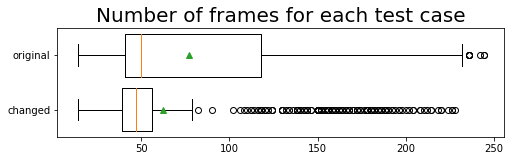

In [86]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,2))
plt.boxplot([changed_number_of_frames, original_number_of_frames], 
            labels=['changed','original'], vert=False, showmeans=True, widths=0.8)
plt.title("Number of frames for each test case", fontsize=20)
plt.show()

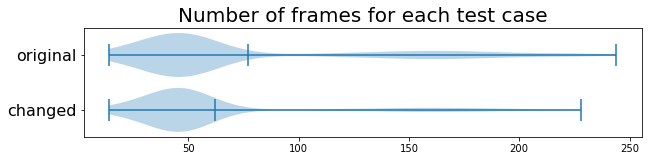

In [87]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,2))
plt.violinplot([changed_number_of_frames, original_number_of_frames], vert=False, showmeans=True, widths=0.8)
plt.title("Number of frames for each test case", fontsize=20)
plt.yticks(range(1,3), ['changed','original'],fontsize=16)
plt.show()

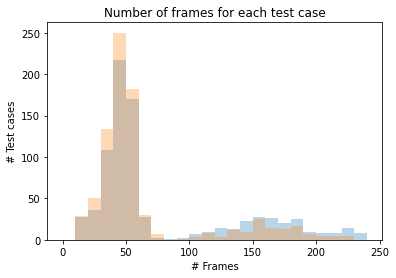

array([  0.,  -1., -14., -25., -33., -12.,  -2.,  -5.,   1.,   1.,   4.,
         2.,  11.,   1.,  14.,   2.,  12.,   7.,   8.,   3.,   3.,   3.,
         9.,   8.])

In [85]:
bins1 = plt.hist(original_number_of_frames, bins=range(0,250,10), alpha=0.3)
bins2 = plt.hist(changed_number_of_frames[:809], bins=range(0,250,10), alpha=0.3)

plt.title("Number of frames for each test case")
plt.ylabel('# Test cases')
plt.xlabel('# Frames')
plt.show()
bins1[0]-bins2[0]

In [22]:

criterion_header = ["RouteCompletionTest",   
                    "RouteCompletionTest_figure",
                    "OutsideRouteLanesTest", 
                    "OutsideRouteLanesTest_figure",
                    "CollisionTest",         
                    "CollisionTest_figure",
                    "RunningRedLightTest",   
                    "RunningRedLightTest_figure",
                    "RunningStopTest",       
                    "RunningStopTest_figure",
                    "InRouteTest", 
                    "InRouteTest_figure",          
                    "AgentBlockedTest",
                    "AgentBlockedTest_figure",      
                    "Timeout"]

criterion_bool_head = ["RouteCompletionTest",   
                        "OutsideRouteLanesTest", 
                        "CollisionTest",         
                        # "RunningRedLightTest",   
                        # "RunningStopTest",       
                        # "InRouteTest", 
                        # "AgentBlockedTest",
                        "Timeout"]

scenario_header = ["cloudiness",
                   "precipitation",
                   "precipitation_deposits",
                   "wind_intensity",
                   "sun_azimuth_angle",
                   "sun_altitude_angle",
                   "fog_density",
                   "wetness",
                   "fog_falloff",
                   "vehicle_infront", 
                   "vehicle_opposite", 
                   "vehicle_side",
                   "start_offset",
                   "end_offset"]

select_criterions = ["RouteCompletionTest", 
                     "CollisionTest", 
                     "OutsideRouteLanesTest", 
                     "Timeout"] 


In [28]:
original_data = '../data/routes_short_2023-05-12|17:04:09/'
changed_data  = '../data/routes_short_2023-06-06|18:33:36/'

original_criterions = pd.read_csv(original_data+'criterion-replace.csv',names=criterion_header)
original_scenarios  = pd.read_csv(original_data+'scenario.csv',names=scenario_header)

changed_criterions = pd.read_csv(changed_data+'criterion.csv',names=criterion_header)
changed_scenarios  = pd.read_csv(changed_data+'scenario.csv',names=scenario_header)

print(original_criterions.shape)
print(changed_criterions.shape)

print(original_scenarios.shape)
print(changed_scenarios.shape)

(809, 15)
(912, 15)
(809, 14)
(912, 14)


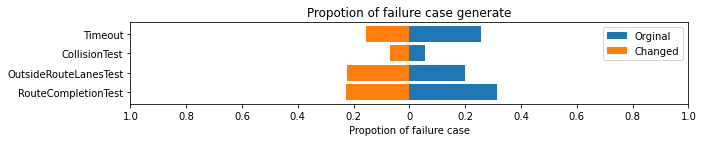

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,1.5))
plt.barh(criterion_bool_head, (original_criterions[criterion_bool_head] == 1).sum()/len(original_criterions))
plt.barh(criterion_bool_head, -(changed_criterions[criterion_bool_head] == 1).sum()/len(changed_criterions))
plt.legend(['Orginal','Changed'])
plt.title('Propotion of failure case generate')
plt.xlabel('Propotion of failure case')
plt.xticks(np.arange(-1,1.2,0.2),[1.0,0.8,0.6,0.4,0.2,0,0.2,0.4,0.6,0.8,1.0])
plt.show()

(-0.0954, 0.6111)
(-0.1196, 0.5755)


/home/guannan/miniconda3/envs/TCP/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().


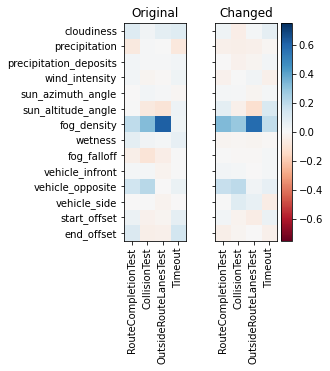

In [33]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(3.2, 4), sharey=True)


ax1.set_title('Original')
scenario_criterion = pd.concat([original_scenarios, original_criterions[select_criterions]],axis=1)
print("({}, {})".format(round(scenario_criterion.corr().to_numpy()[:14, 14:18].min(), 4), 
                        round(scenario_criterion.corr().to_numpy()[:14, 14:18].max(), 4)))
fig1 = ax1.imshow(scenario_criterion.corr().to_numpy()[:14, 14:18], cmap='RdBu', vmin=-0.75, vmax=0.75)
# plt.yticks(range(14),scenario_criterion.columns.tolist()[:14])
# plt.xticks(range(4),scenario_criterion.columns.tolist()[14:18],rotation=90)

ax2.set_title('Changed')
scenario_criterion = pd.concat([changed_scenarios, changed_criterions[select_criterions]],axis=1)
print("({}, {})".format(round(scenario_criterion.corr().to_numpy()[:14, 14:18].min(), 4), 
                        round(scenario_criterion.corr().to_numpy()[:14, 14:18].max(), 4)))
fig2 = ax2.imshow(scenario_criterion.corr().to_numpy()[:14, 14:18], cmap='RdBu', vmin=-0.75, vmax=0.75)

ax1.set_yticks(range(14),scenario_criterion.columns.tolist()[:14])
ax1.set_xticks(range(4),scenario_criterion.columns.tolist()[14:18],rotation=90)
ax2.set_xticks(range(4),scenario_criterion.columns.tolist()[14:18],rotation=90)
# plt.yticks([])
# plt.xticks(range(4),scenario_criterion.columns.tolist()[14:18],rotation=90)
fig.colorbar(fig1, cmap='RdBu')

plt.show()

/home/guannan/miniconda3/envs/TCP/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().


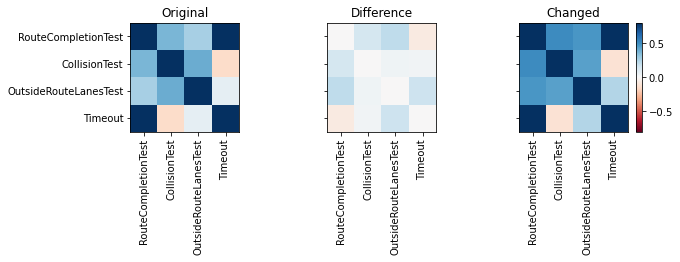

In [57]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(10, 2), sharey=True)


ax1.set_title('Original')
scenario_criterion = pd.concat([original_scenarios, original_criterions[select_criterions]],axis=1)
fig1 = ax1.imshow(scenario_criterion.corr().to_numpy()[14:18, 14:18], cmap='RdBu', vmin=-0.8, vmax=0.8)

ax3.set_title('Changed')
scenario_criterion = pd.concat([changed_scenarios, changed_criterions[select_criterions]],axis=1)
fig3 = ax3.imshow(scenario_criterion.corr().to_numpy()[14:18, 14:18], cmap='RdBu', vmin=-0.8, vmax=0.8)

ax2.set_title('Difference')
fig2 = ax2.imshow(-(pd.concat([original_scenarios, original_criterions[select_criterions]],axis=1).corr() - pd.concat([changed_scenarios, changed_criterions[select_criterions]],axis=1).corr()).to_numpy()[14:18, 14:18], 
                  cmap='RdBu', vmin=-0.8, vmax=0.8)


ax1.set_yticks(range(4),scenario_criterion.columns.tolist()[14:18])
ax1.set_xticks(range(4),scenario_criterion.columns.tolist()[14:18],rotation=90)
ax2.set_xticks(range(4),scenario_criterion.columns.tolist()[14:18],rotation=90)
ax3.set_xticks(range(4),scenario_criterion.columns.tolist()[14:18],rotation=90)
fig.colorbar(fig1, cmap='RdBu')

plt.show()